In [1]:
import pandas as pd 
import numpy as np 

This dataset was taken from kaggle and contains the text from thousands of tweets regarding vaccination. It contains the text of the tweet, and metrics about the poster of the tweet.  

In [2]:
#get the data in 

raw_df= pd.read_csv(r'C:\Users\Devin\Desktop\thinkful\unsupervised\vaccination_all_tweets.csv')

In [3]:
raw_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46059 entries, 0 to 46058
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                46059 non-null  int64 
 1   user_name         46059 non-null  object
 2   user_location     35694 non-null  object
 3   user_description  42969 non-null  object
 4   user_created      46059 non-null  object
 5   user_followers    46059 non-null  int64 
 6   user_friends      46059 non-null  int64 
 7   user_favourites   46059 non-null  int64 
 8   user_verified     46059 non-null  bool  
 9   date              46059 non-null  object
 10  text              46059 non-null  object
 11  hashtags          36243 non-null  object
 12  source            46017 non-null  object
 13  retweets          46059 non-null  int64 
 14  favorites         46059 non-null  int64 
 15  is_retweet        46059 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 5.0+ MB


In [5]:
#ok, data contains numerous users and their tweets on vaccination 

#lets see if we can group them 

#ok, start by isolating the numeric features and going from there 

# we want to keep user id, user_followers, user_friends, user_favorites, user_verified, (date - transform this ), retweets, favorites, and is retweet 

In [6]:
#first, transform the date to something we can work with 

raw_df['date']

0        2020-12-20 06:06:44
1        2020-12-13 16:27:13
2        2020-12-12 20:33:45
3        2020-12-12 20:23:59
4        2020-12-12 20:17:19
                ...         
46054    2021-03-28 07:53:51
46055    2021-03-28 07:28:26
46056    2021-03-28 07:07:51
46057    2021-03-28 06:29:10
46058    2021-03-28 06:23:51
Name: date, Length: 46059, dtype: object

In [7]:
#convert it to a datatime object 

raw_df['date'] = pd.to_datetime(raw_df['date'])


In [8]:
#ok, looks good 
raw_df['date']

0       2020-12-20 06:06:44
1       2020-12-13 16:27:13
2       2020-12-12 20:33:45
3       2020-12-12 20:23:59
4       2020-12-12 20:17:19
                ...        
46054   2021-03-28 07:53:51
46055   2021-03-28 07:28:26
46056   2021-03-28 07:07:51
46057   2021-03-28 06:29:10
46058   2021-03-28 06:23:51
Name: date, Length: 46059, dtype: datetime64[ns]

In [9]:
# seperating into the seperate features 
raw_df['year'] = raw_df['date'].dt.year
raw_df['month'] = raw_df['date'].dt.month
raw_df['day'] = raw_df['date'].dt.day

In [10]:
raw_df.drop('date', axis=1, inplace=True)

In [11]:
#see what else we have left... 
raw_df.info()

#ok, lets narrow it down to just the features that were mentioned earlier. 
# we can reference all the string data later with the unique user id if we want info on a specific user 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46059 entries, 0 to 46058
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                46059 non-null  int64 
 1   user_name         46059 non-null  object
 2   user_location     35694 non-null  object
 3   user_description  42969 non-null  object
 4   user_created      46059 non-null  object
 5   user_followers    46059 non-null  int64 
 6   user_friends      46059 non-null  int64 
 7   user_favourites   46059 non-null  int64 
 8   user_verified     46059 non-null  bool  
 9   text              46059 non-null  object
 10  hashtags          36243 non-null  object
 11  source            46017 non-null  object
 12  retweets          46059 non-null  int64 
 13  favorites         46059 non-null  int64 
 14  is_retweet        46059 non-null  bool  
 15  year              46059 non-null  int64 
 16  month             46059 non-null  int64 
 17  day         

In [12]:
df = raw_df[['id', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'retweets', 'favorites', 
             'is_retweet' ]]

#including the datetime information produces poor clusters due to it's continuous nature
#does not add much information to this exploration, lets remove it  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46059 entries, 0 to 46058
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               46059 non-null  int64
 1   user_followers   46059 non-null  int64
 2   user_friends     46059 non-null  int64
 3   user_favourites  46059 non-null  int64
 4   user_verified    46059 non-null  bool 
 5   retweets         46059 non-null  int64
 6   favorites        46059 non-null  int64
 7   is_retweet       46059 non-null  bool 
dtypes: bool(2), int64(6)
memory usage: 2.2 MB


In [14]:
df.isna().any()

id                 False
user_followers     False
user_friends       False
user_favourites    False
user_verified      False
retweets           False
favorites          False
is_retweet         False
dtype: bool

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df = scaler.fit_transform(df)

X_std = pd.DataFrame(df)

X_std2 = X_std.copy()


In [16]:
# ok split it up into 10,000 replicates for the visualization in umap 

indices = np.random.choice(46059, 1000)
X_sample = X_std.loc[indices]


In [17]:
# now do the umap visulization

import umap 

umap_results = umap.UMAP(n_neighbors=40, min_dist = 0.3, metric ='correlation').fit_transform(X_sample)


Text(0.5, 1.0, 'UMAP projection of vaccine dataset')

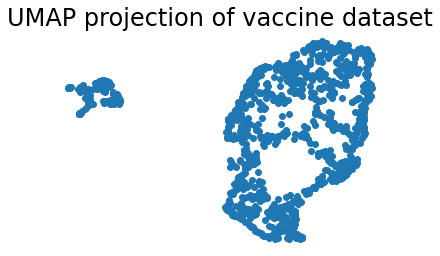

In [18]:
import matplotlib.pyplot as plt 
plt.scatter(
    umap_results[:, 0],
    umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('UMAP projection of vaccine dataset', fontsize=24)

This dimensionality reduction algorithm allows us to visualize the data by reducing it to 2 dimensions, whereas it was around 7 dimensions before. Human minds are not adept at visualizing anything beyond 3d, so it is common practice to utilize algorithms such as UMAP to build a 2d projection of the data that preserves the features as accuratly as possible and projects them to a 2d representation. 

Looks like there is around 3 groups in the dataset. Lets try the k-means algorigthm with this in mind. 

In [20]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3)
k_means.fit(X_std)
y_pred = k_means.predict(X_std)


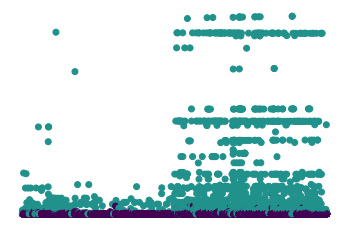

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(X_std)


plt.scatter(X_std.loc[:,0], X_std.loc[:,1], c=y_pred)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Looks like k-means produced a much different result than expected. Don't really think the this is the best dataset for clustering. Maybe it would work better with a natural language processing project... 

Anyways, lets see if DBSCAN will produce a different result. 

In [25]:
from sklearn.cluster import DBSCAN

# Defining the model
dbscan_cluster = DBSCAN(eps=1, min_samples=1000)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std2)




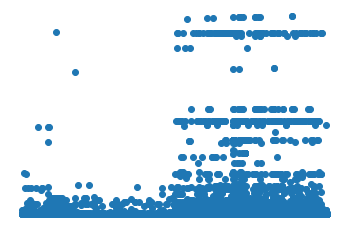

In [26]:
pca = PCA(n_components=2).fit_transform(X_std2)


plt.scatter(X_std2.loc[:,0], X_std2.loc[:,1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

#when this section of code 

The shape of the cluster does not seem to change despite the different parameters I put into the dbscan model. Ultimately, this dataset was a poor choice for this sort of analysis. I did learn a lot about managing computational resources in this assignment though. My computer did not have enough ram for a lot of the analysis, and I gained insight into how to better utilize it. 

For my capstone, I will pick a smaller dataset, that has more variability in it. 